In [282]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [283]:
# Load the CSV data for static TL
df_static = pd.read_csv("outputs/static_vehicle_data/processed_static_vehicle_data.csv")

# Remove trailing spaces in column names
df_static.columns = df_static.columns.str.strip()

# Filter for 6-7 AM (900-4500s)
df_static = df_static[(df_static['data_timestep'] >= 900) & (df_static['data_timestep'] <= 4500)]

In [284]:
# Load the CSV data for static TL
df_dynamic = pd.read_csv("outputs/dynamic_vehicle_data/processed_dynamic_vehicle_data.csv")

# Remove trailing spaces in column names
df_dynamic.columns = df_dynamic.columns.str.strip()

# Filter for 6-7 AM (900-4500s)
df_dynamic = df_dynamic[(df_dynamic['data_timestep'] >= 900) & (df_dynamic['data_timestep'] <= 4500)]

In [285]:
df_dynamic['lane_queueing_length_experimental'] = pd.to_numeric(df_dynamic['lane_queueing_length_experimental'], 
                                                    errors='coerce')
df_static['lane_queueing_length_experimental'] = pd.to_numeric(df_static['lane_queueing_length_experimental'], 
                                                    errors='coerce')

df_dynamic['lane_queueing_time'] = pd.to_numeric(df_dynamic['lane_queueing_time'], 
                                                    errors='coerce')
df_static['lane_queueing_time'] = pd.to_numeric(df_static['lane_queueing_time'], 
                                                    errors='coerce')

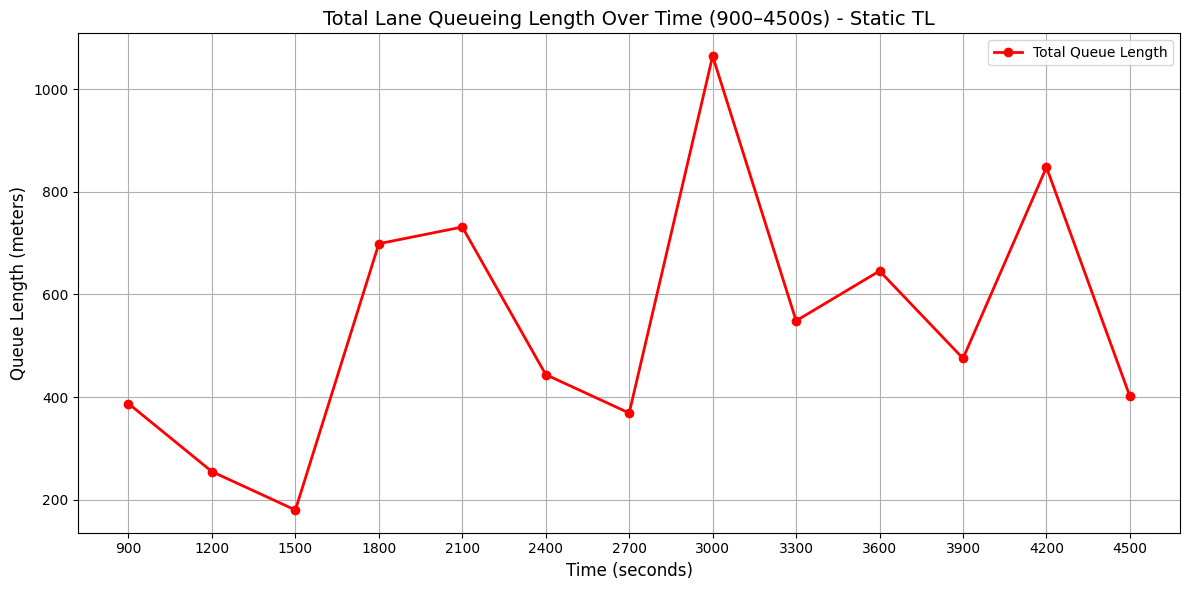

In [286]:

total_queue_length_static = df_static.groupby('data_timestep')['lane_queueing_length_experimental'].sum().reset_index()

# Create plot
plt.figure(figsize=(12, 6))
plt.plot(total_queue_length_static['data_timestep'], total_queue_length_static['lane_queueing_length_experimental'], 
         label='Total Queue Length', marker='o', color='red', linewidth=2)

# Customize plot
plt.title('Total Lane Queueing Length Over Time (900–4500s) - Static TL', fontsize=14)
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Queue Length (meters)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.xticks(np.arange(900, 4501, 300))
plt.tight_layout()

# Show plot
plt.show()

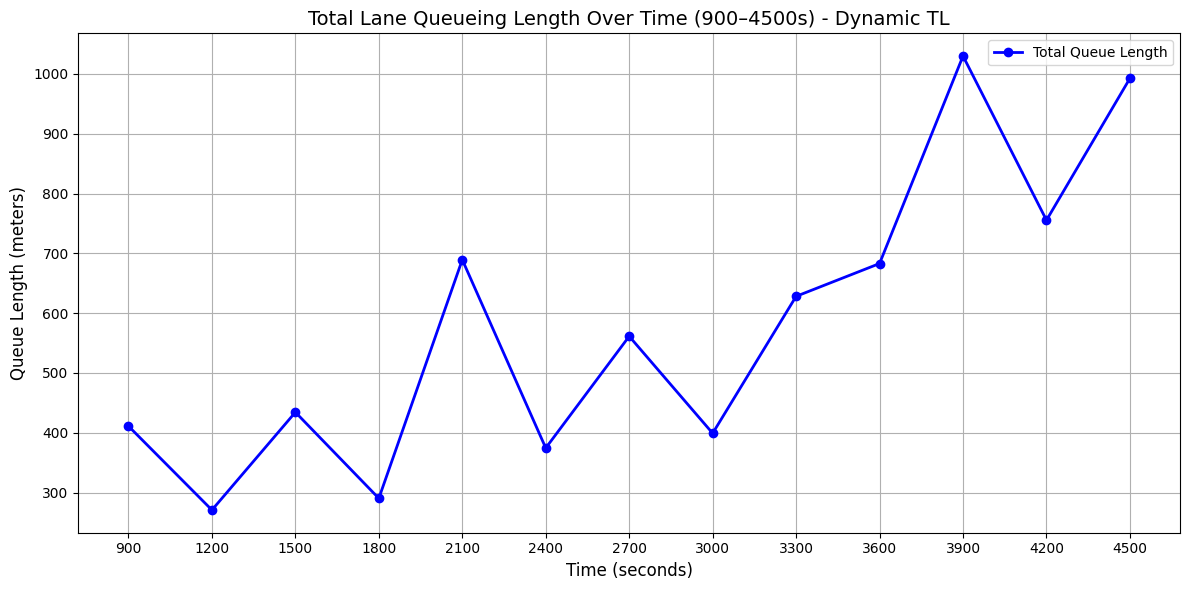

In [287]:
total_queue_length_dynamic = df_dynamic.groupby('data_timestep')['lane_queueing_length_experimental'].sum().reset_index()

# Create plot
plt.figure(figsize=(12, 6))
plt.plot(total_queue_length_dynamic['data_timestep'], total_queue_length_dynamic['lane_queueing_length_experimental'], 
         label='Total Queue Length', marker='o', color='blue', linewidth=2)

# Customize plot
plt.title('Total Lane Queueing Length Over Time (900–4500s) - Dynamic TL', fontsize=14)
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Queue Length (meters)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.xticks(np.arange(900, 4501, 300))
plt.tight_layout()

# Show plot
plt.show()


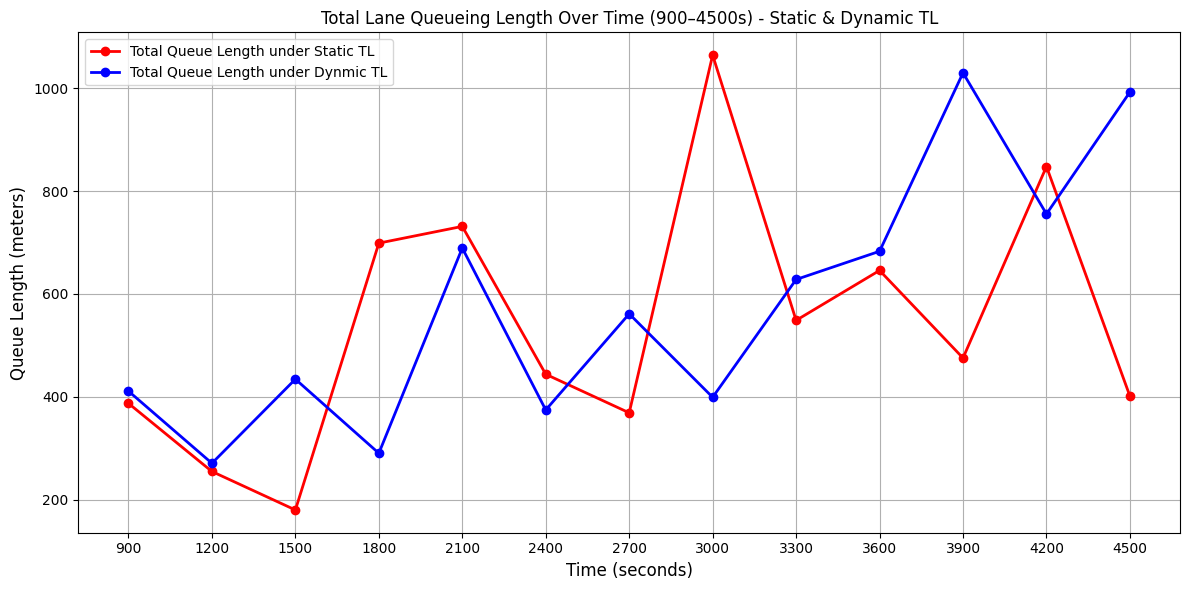

In [288]:
total_queue_length_dynamic = df_dynamic.groupby('data_timestep')['lane_queueing_length_experimental'].sum().reset_index()
total_queue_length_static = df_static.groupby('data_timestep')['lane_queueing_length_experimental'].sum().reset_index()

# Create plot
plt.figure(figsize=(12, 6))
plt.plot(total_queue_length_static['data_timestep'], total_queue_length_static['lane_queueing_length_experimental'], 
         label='Total Queue Length under Static TL', marker='o', color='red', linewidth=2)
plt.plot(total_queue_length_dynamic['data_timestep'], total_queue_length_dynamic['lane_queueing_length_experimental'], 
         label='Total Queue Length under Dynmic TL', marker='o', color='blue', linewidth=2)

# Customize plot
plt.title('Total Lane Queueing Length Over Time (900–4500s) - Static & Dynamic TL', fontsize=12)
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Queue Length (meters)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.xticks(np.arange(900, 4501, 300))
plt.tight_layout()

# Show plot
plt.show()

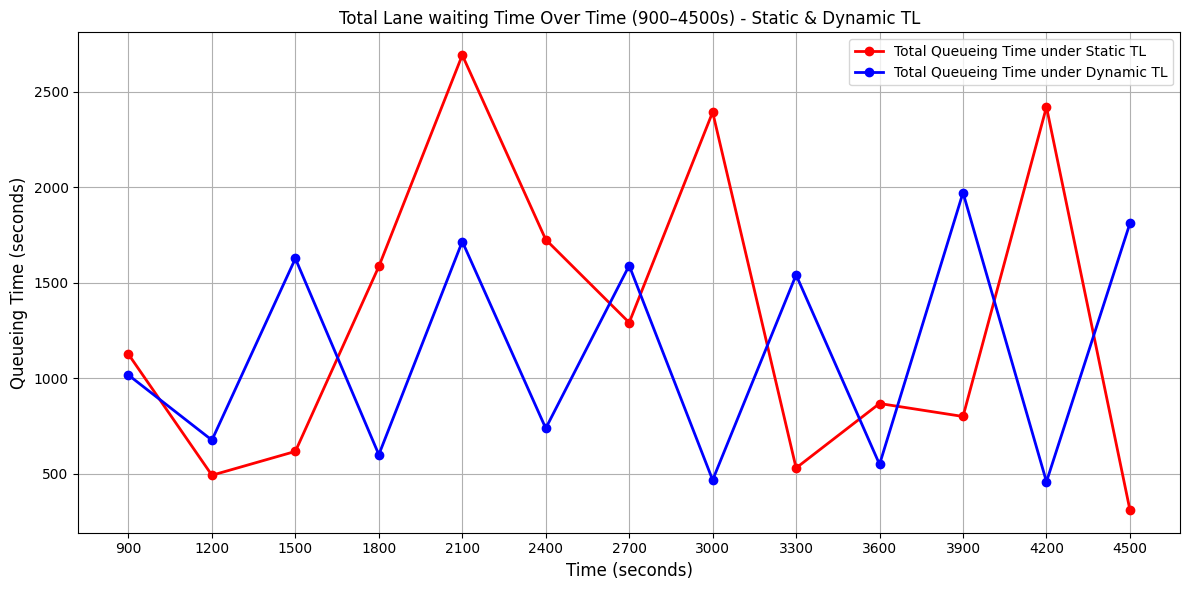

In [289]:
total_queue_time_dynamic = df_dynamic.groupby('data_timestep')['lane_queueing_time'].sum().reset_index()
total_queue_time_static = df_static.groupby('data_timestep')['lane_queueing_time'].sum().reset_index()

# Create plot
plt.figure(figsize=(12, 6))
plt.plot(total_queue_time_static['data_timestep'], total_queue_time_static['lane_queueing_time'], 
         label='Total Queueing Time under Static TL', marker='o', color='red', linewidth=2)
plt.plot(total_queue_time_dynamic['data_timestep'], total_queue_time_dynamic['lane_queueing_time'], 
         label='Total Queueing Time under Dynamic TL', marker='o', color='blue', linewidth=2)

# Customize plot
plt.title('Total Lane waiting Time Over Time (900–4500s) - Static & Dynamic TL', fontsize=12)
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Queueing Time (seconds)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.xticks(np.arange(900, 4501, 300))
plt.tight_layout()

# Show plot
plt.show()